In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
gray_scale = 255

x_train = x_train.astype('float32') / gray_scale
x_test = x_test.astype('float32') / gray_scale

print("Feature matrix (x_train):", x_train.shape)
print("Target matrix (y_train):", y_train.shape)
print("Feature matrix (x_test):", x_test.shape)
print("Target matrix (y_test):", y_test.shape)


Feature matrix (x_train): (60000, 28, 28)
Target matrix (y_train): (60000,)
Feature matrix (x_test): (10000, 28, 28)
Target matrix (y_test): (10000,)


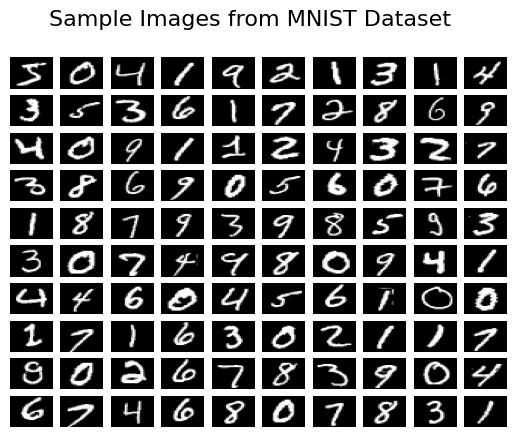

In [4]:
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28, 28), aspect='auto', cmap='gray')
        ax[i][j].axis('off')  
        k += 1
plt.suptitle("Sample Images from MNIST Dataset", fontsize=16)
plt.show()

In [5]:

model = Sequential([
    Input(shape=(28, 28)),  # Định nghĩa đầu vào
    Flatten(),
    Dense(784, activation='sigmoid'),
    Dropout(0.3),
    Dense(128, activation='sigmoid'),
    Dropout(0.3),
    Dense(10, activation='softmax'),
])

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 717,210 (2.74 MB)

 Trainable params: 717,210 (2.74 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
optimizer = Adam(learning_rate=.0005)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
history = model.fit(x_train, y_train, epochs=7, validation_split=0.2)

Epoch 1/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6931 - loss: 1.0190 - val_accuracy: 0.9226 - val_loss: 0.2647
Epoch 2/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9068 - loss: 0.3118 - val_accuracy: 0.9438 - val_loss: 0.1968
Epoch 3/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9313 - loss: 0.2313 - val_accuracy: 0.9532 - val_loss: 0.1624
Epoch 4/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9465 - loss: 0.1803 - val_accuracy: 0.9609 - val_loss: 0.1335
Epoch 5/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9545 - loss: 0.1486 - val_accuracy: 0.9651 - val_loss: 0.1163
Epoch 6/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9632 - loss: 0.1222 - val_accuracy: 0.9688 - val_loss: 0.1068
Epoch 7/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9688 - loss: 0.1029 - val_accuracy: 0.9706 - val_loss: 0.0945


In [9]:
# Evaluating the model on test data
results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss, Test accuracy:', results)


Test loss, Test accuracy: [0.08958366513252258, 0.9718999862670898]


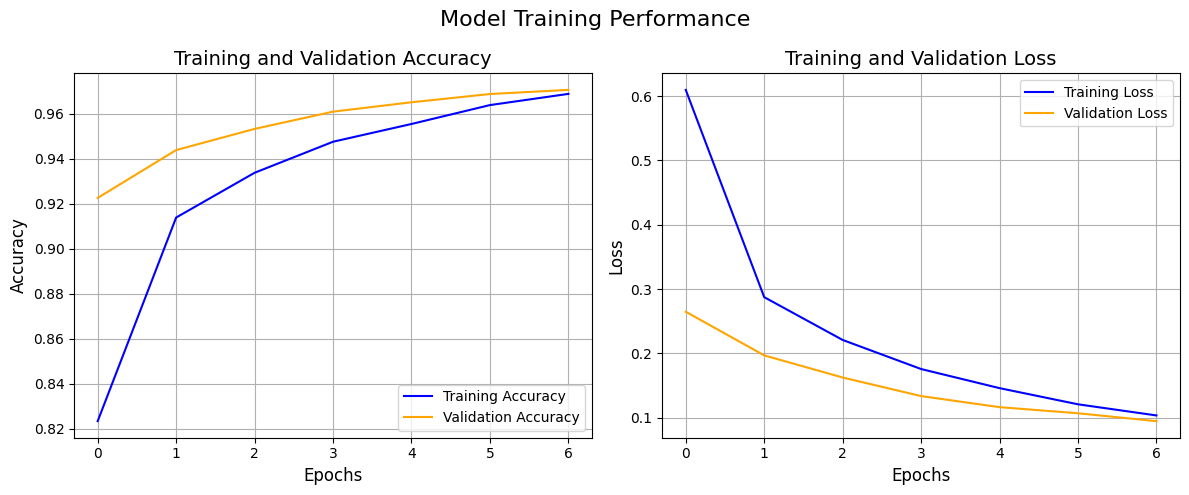

In [10]:
plt.figure(figsize=(12, 5))

# Plotting Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

plt.suptitle("Model Training Performance", fontsize=16)
plt.tight_layout()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


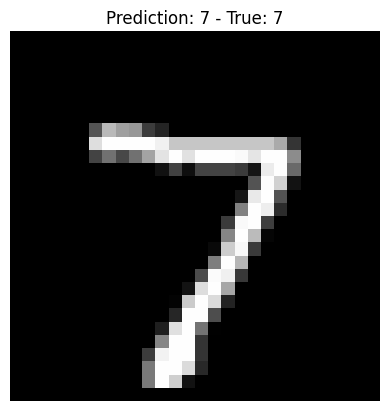

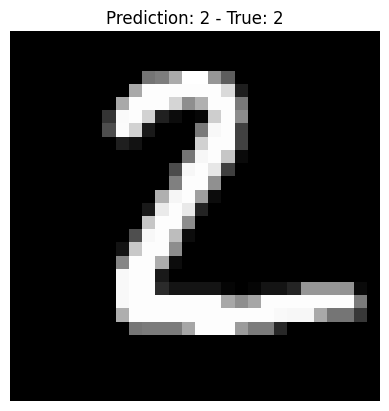

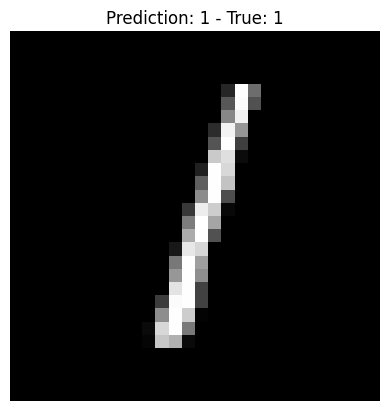

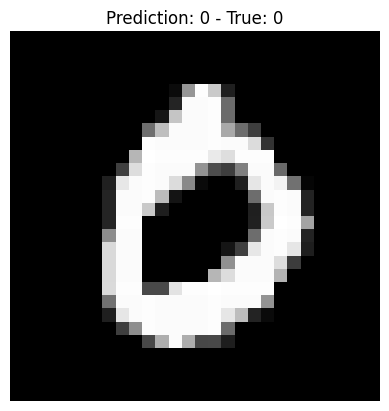

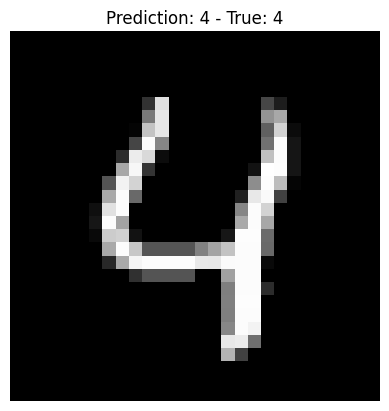

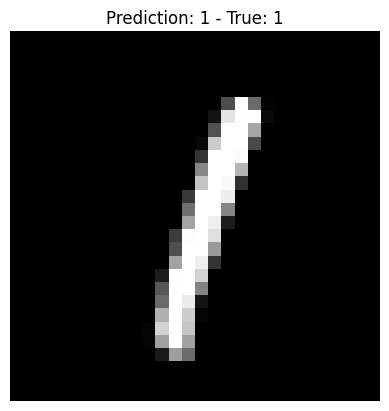

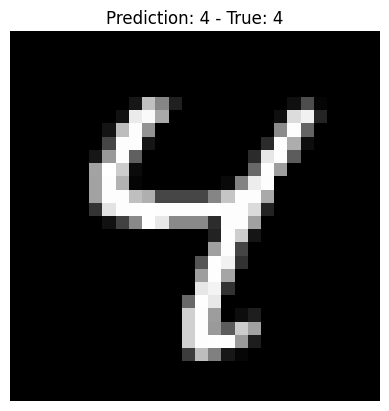

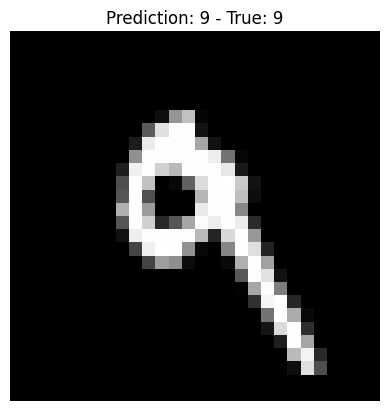

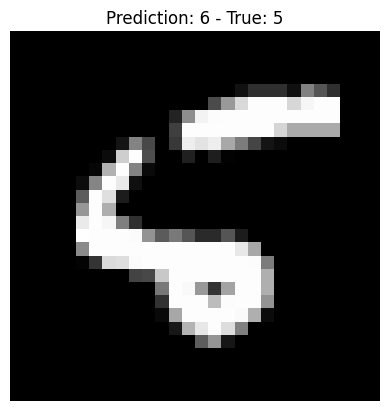

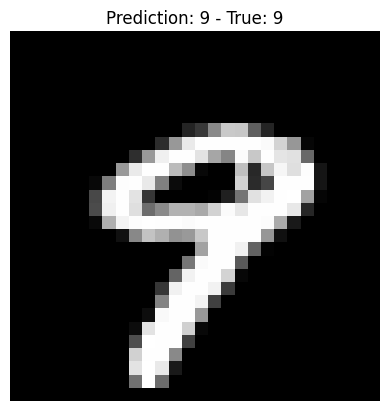

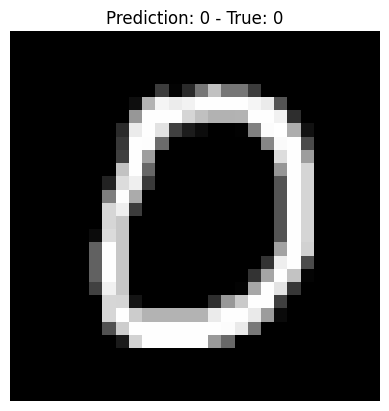

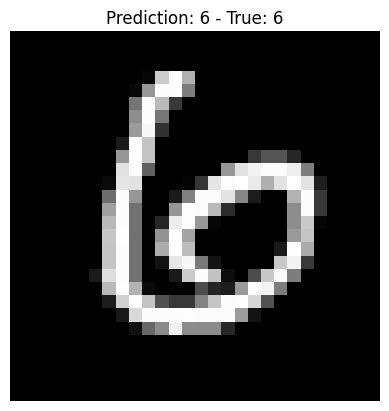

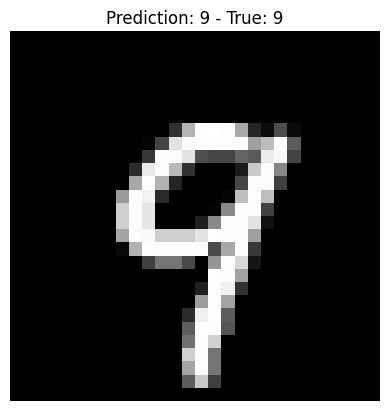

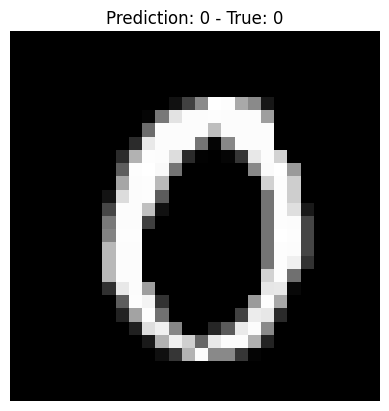

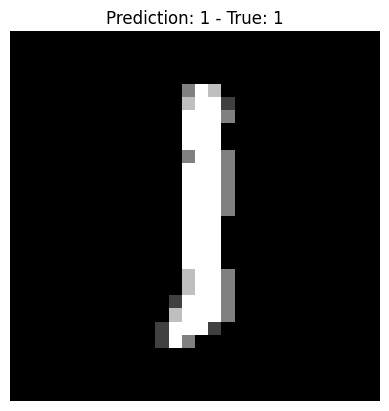

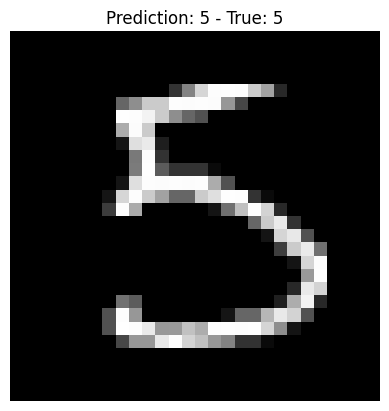

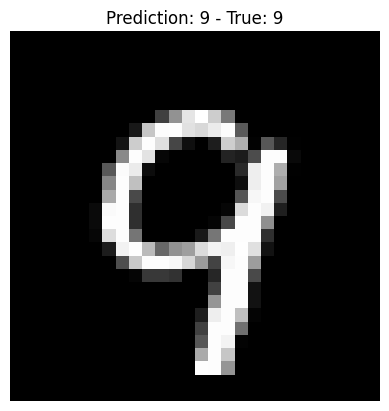

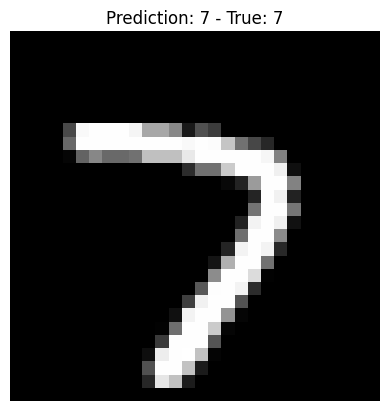

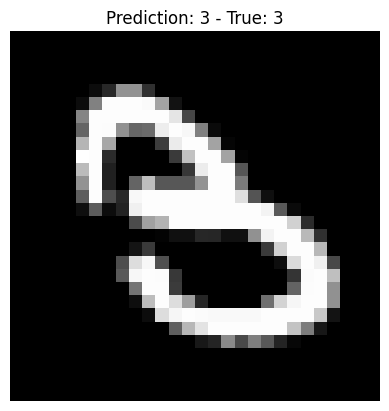

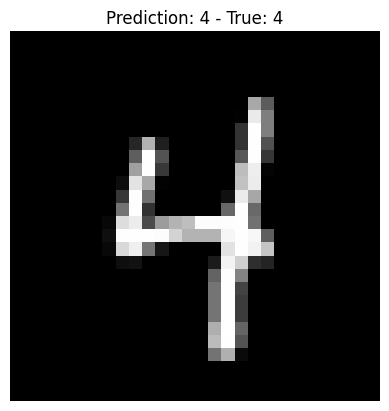

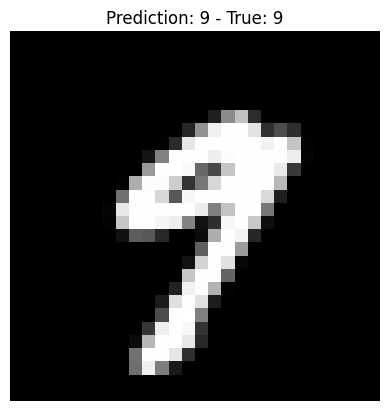

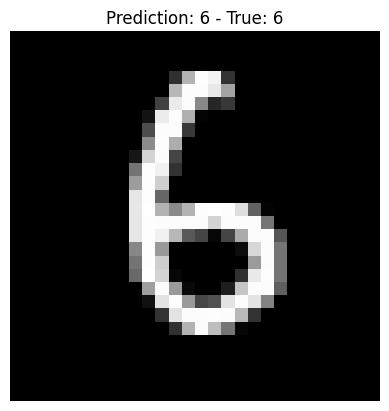

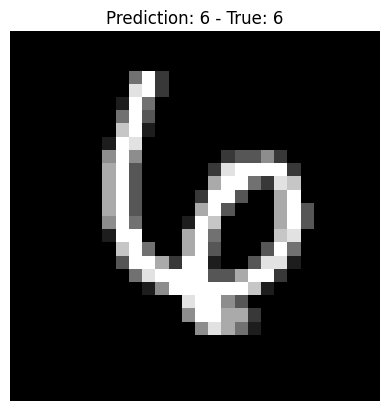

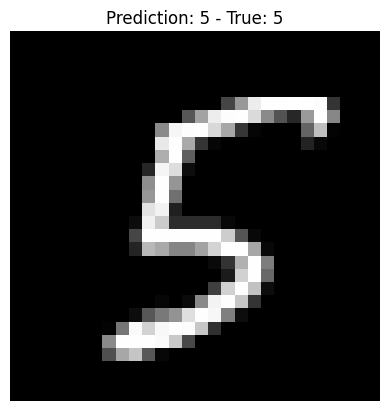

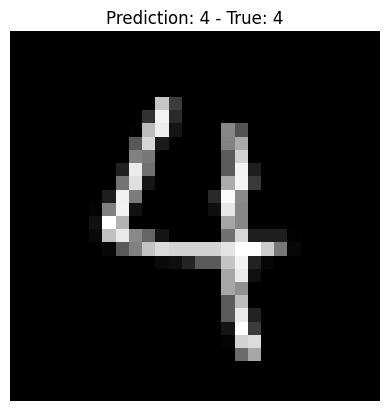

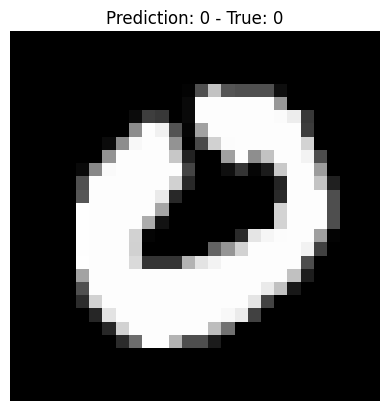

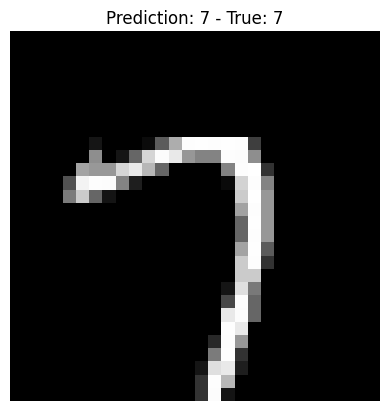

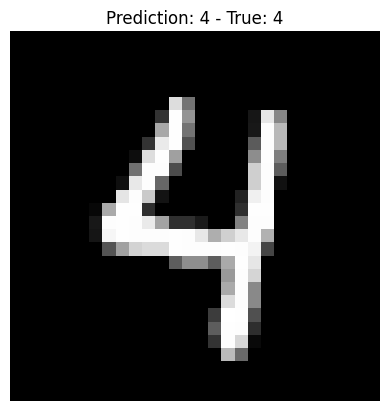

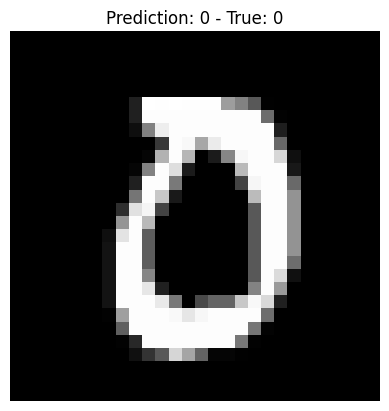

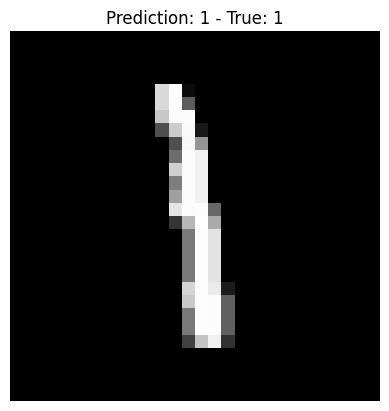

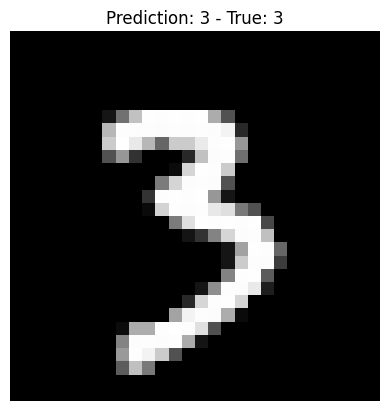

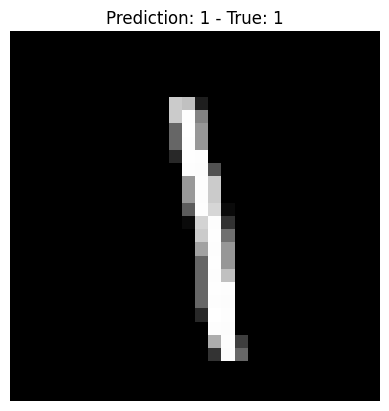

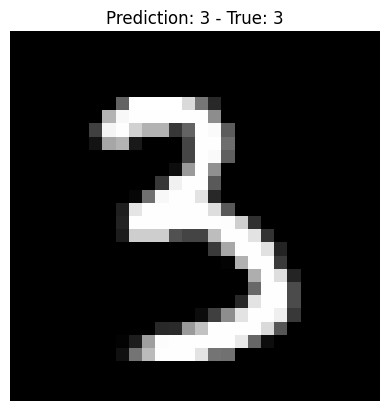

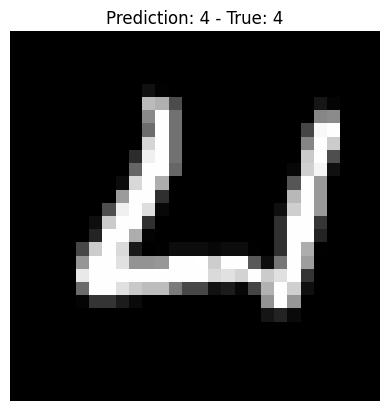

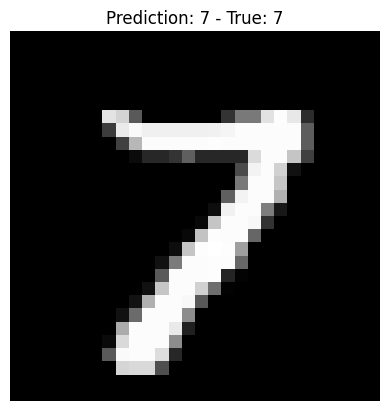

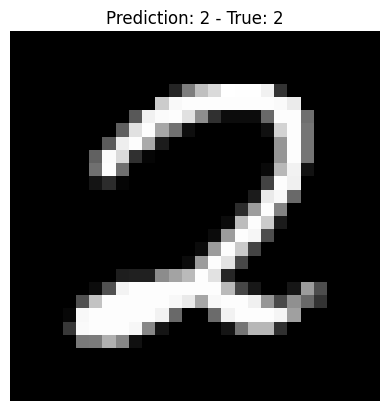

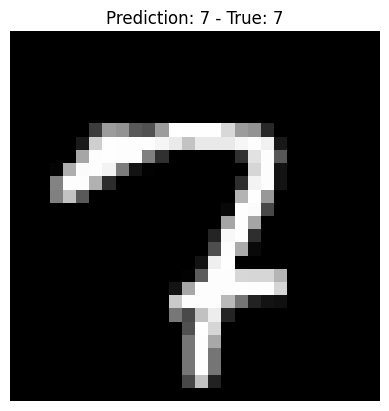

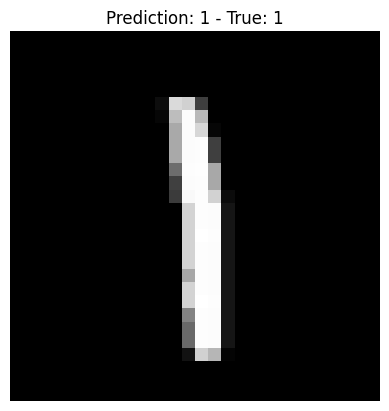

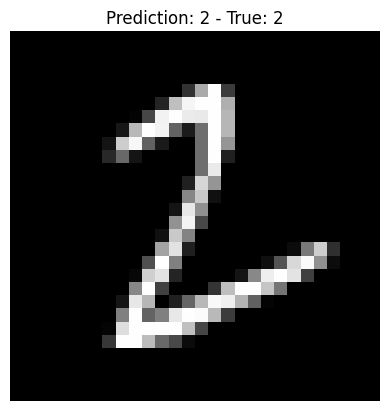

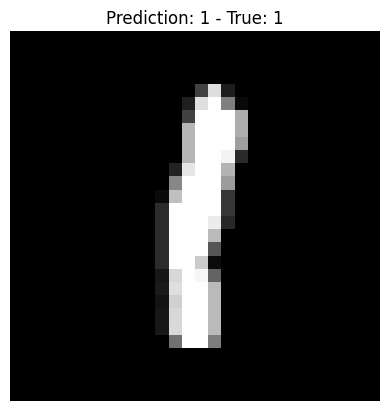

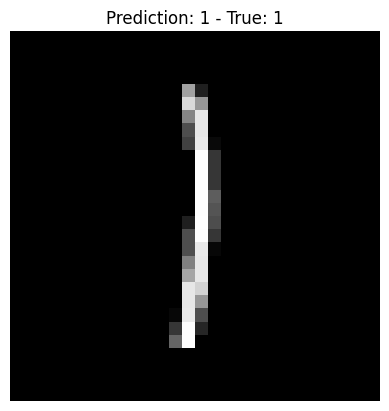

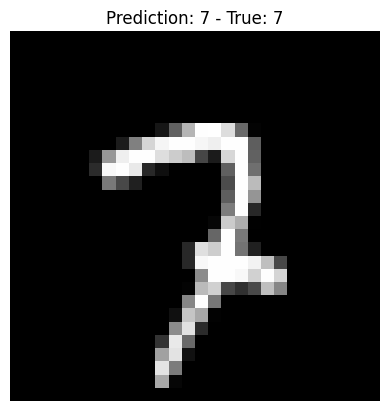

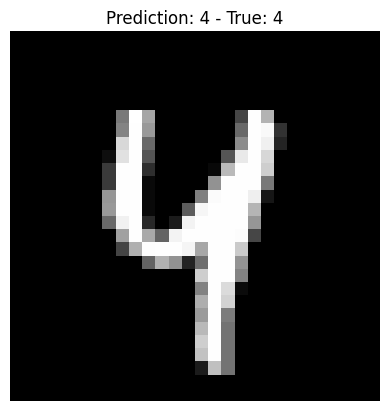

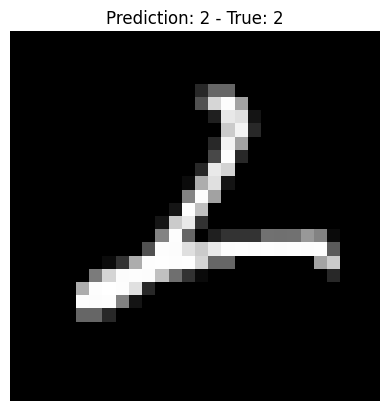

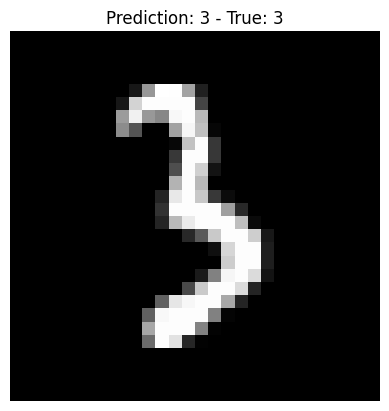

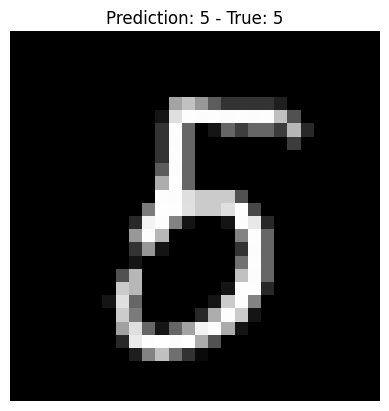

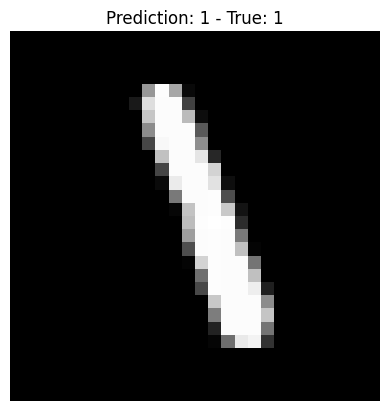

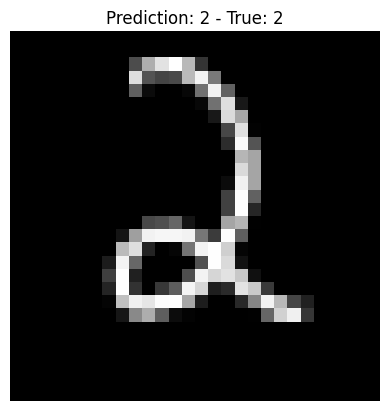

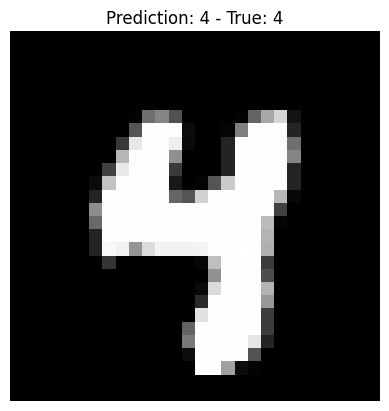

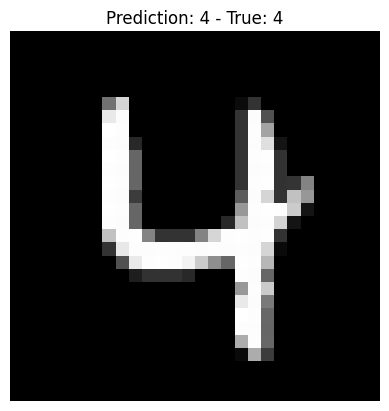

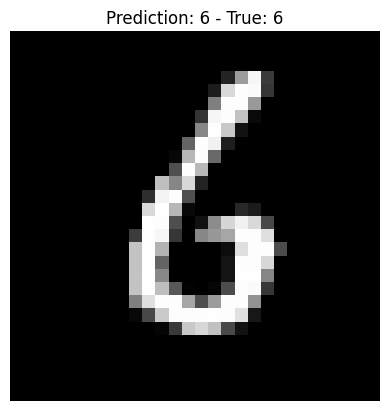

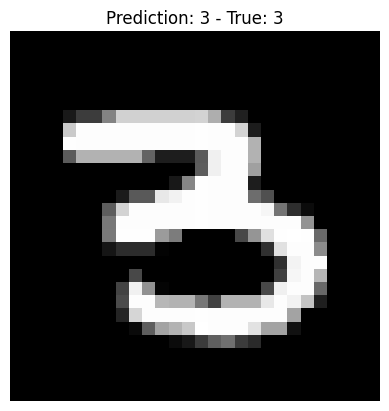

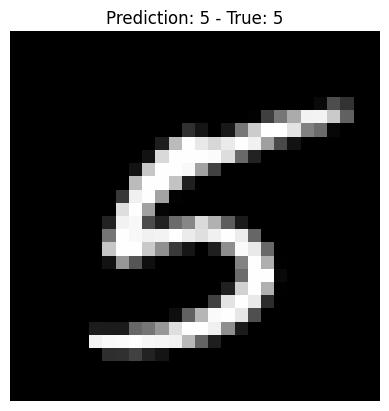

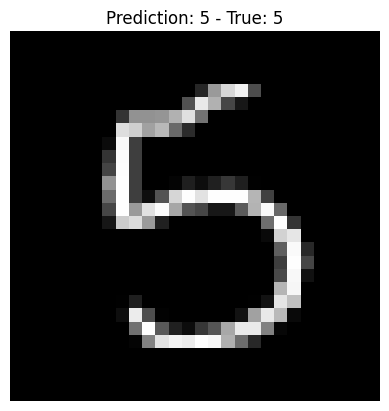

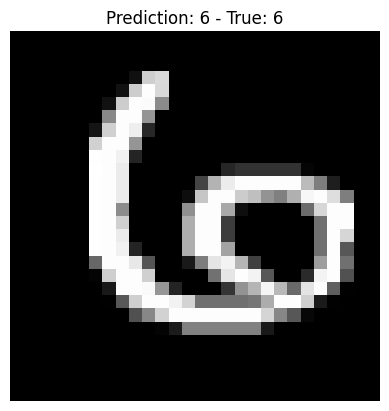

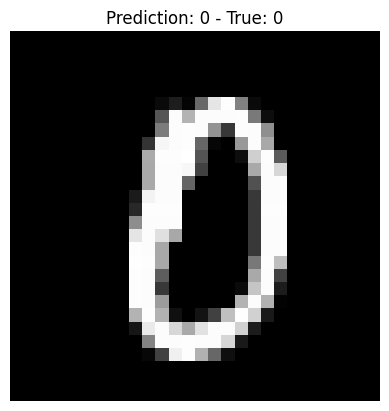

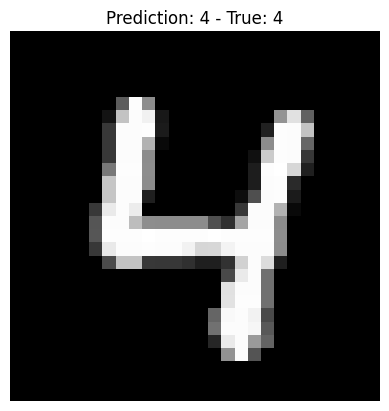

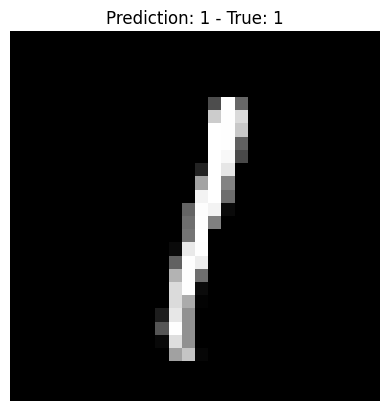

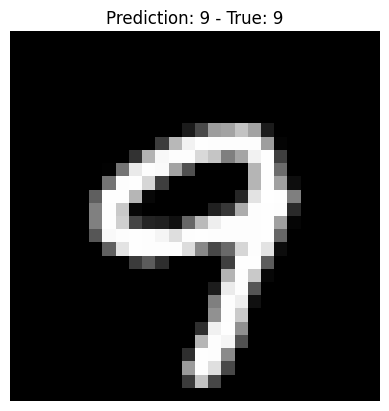

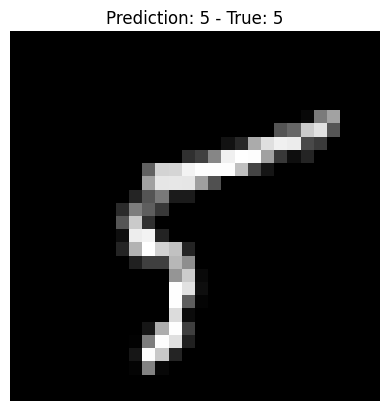

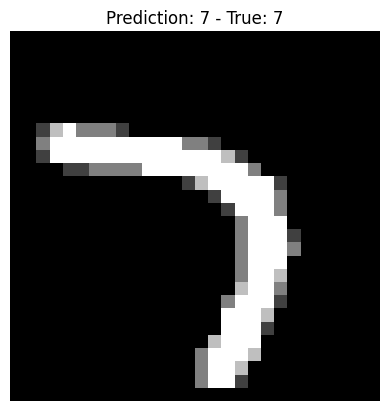

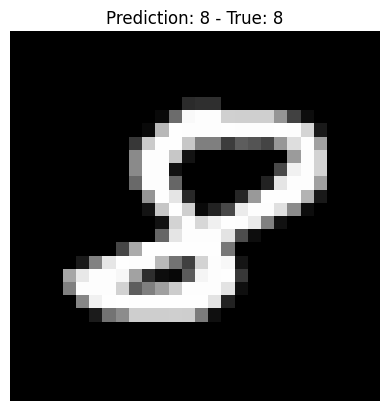

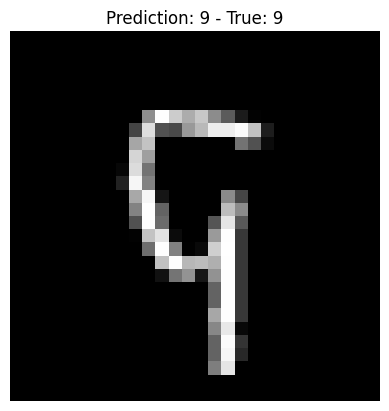

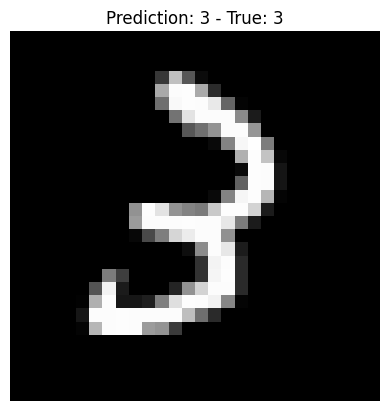

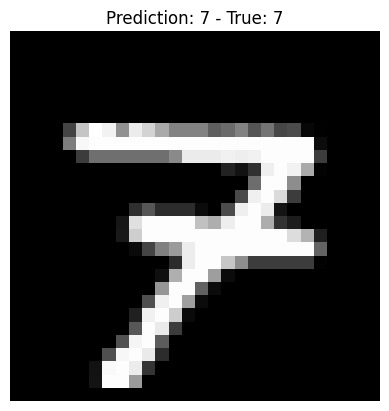

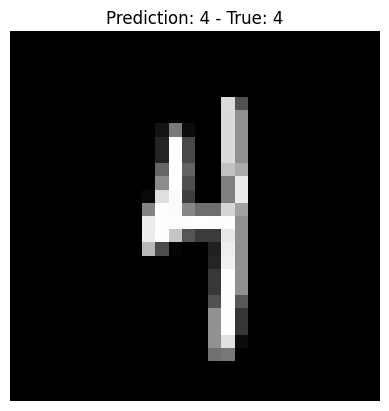

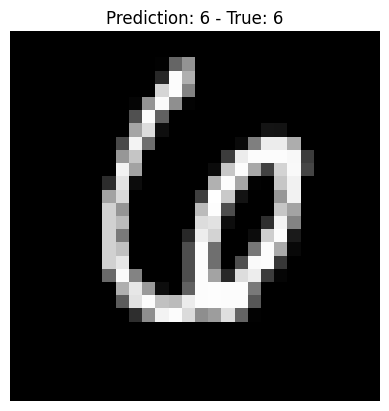

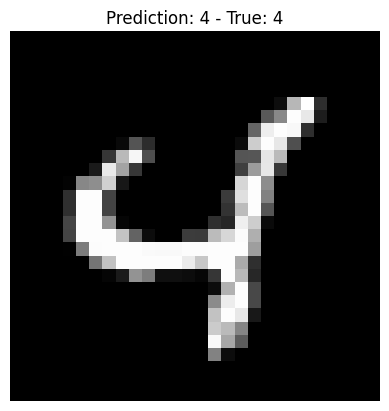

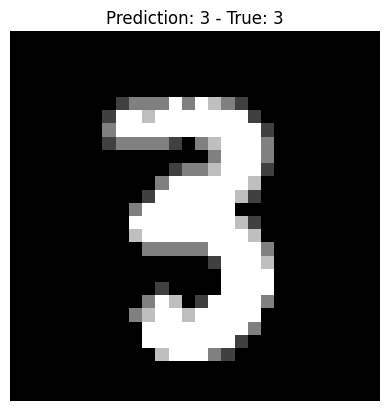

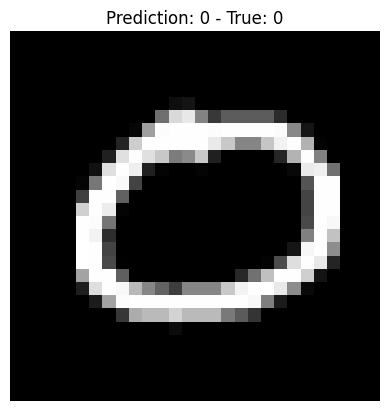

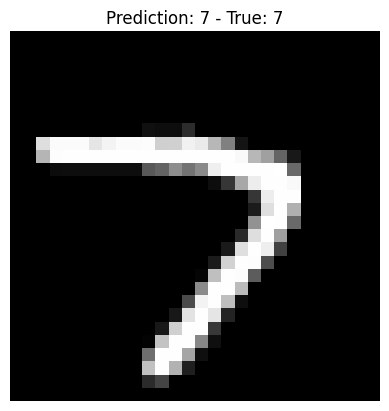

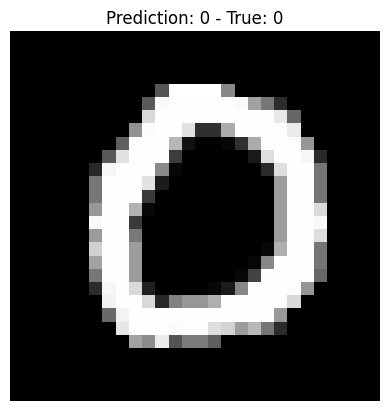

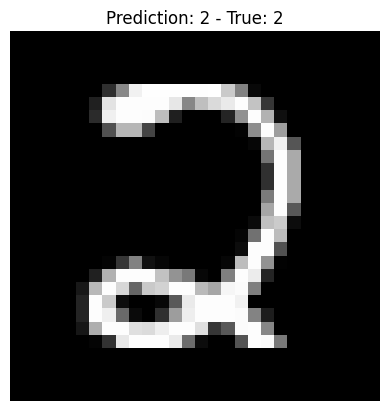

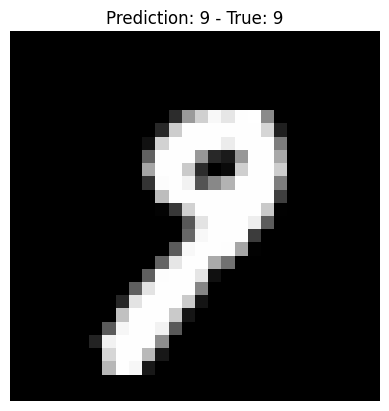

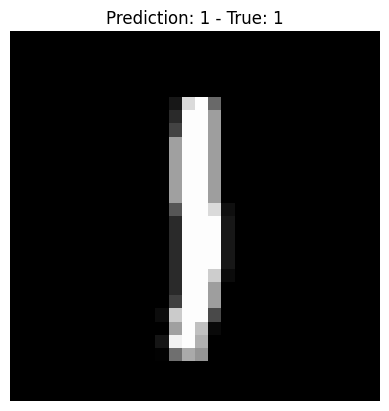

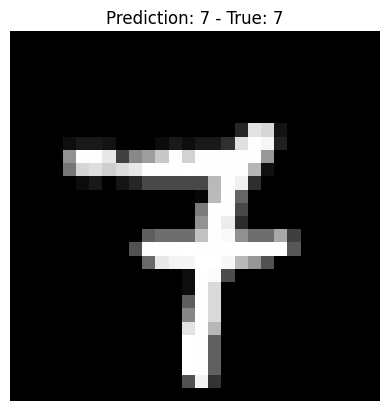

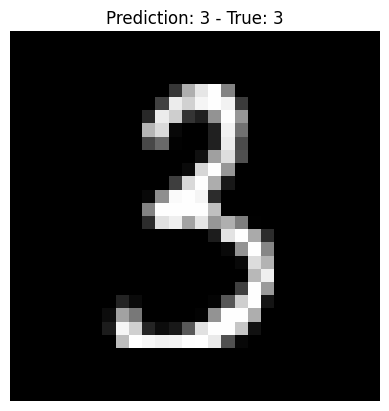

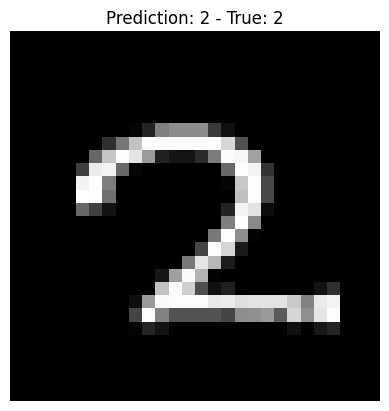

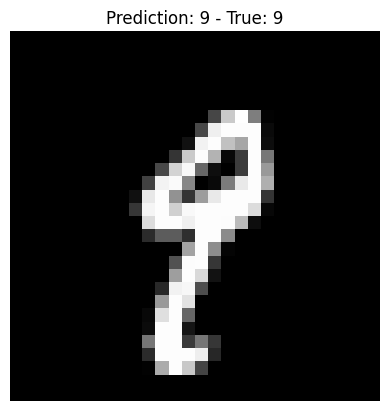

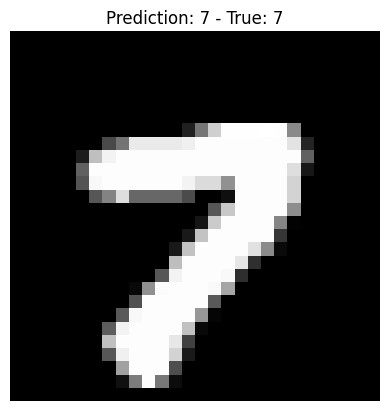

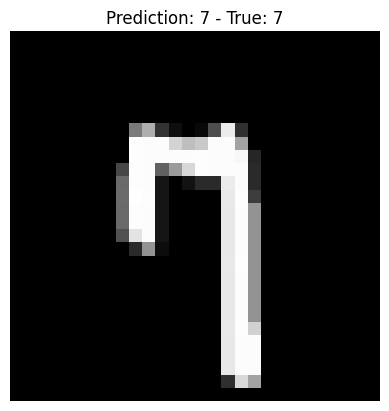

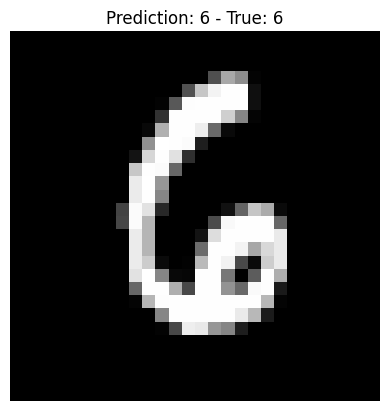

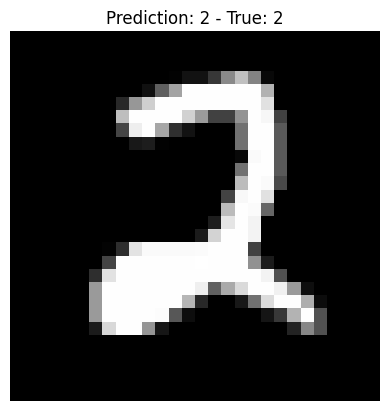

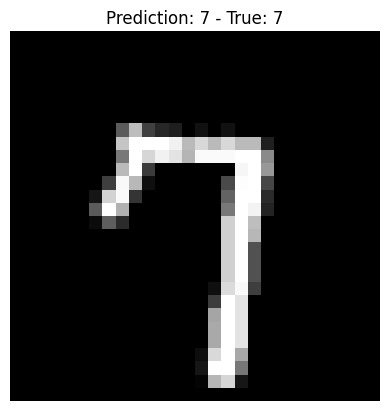

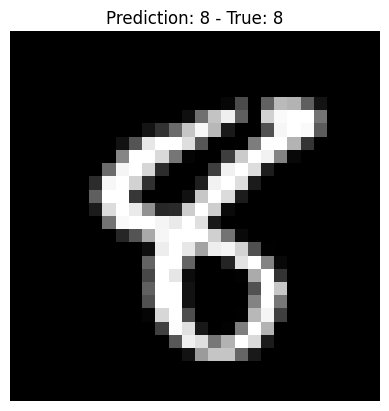

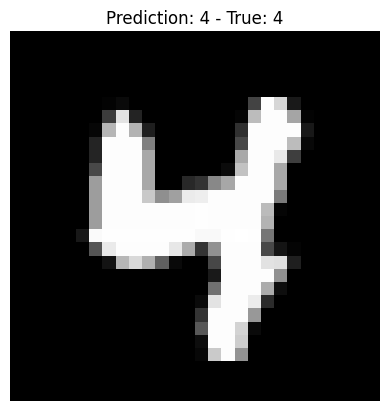

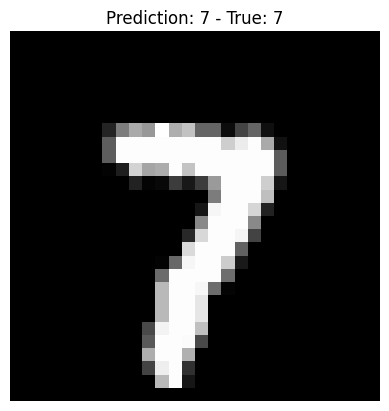

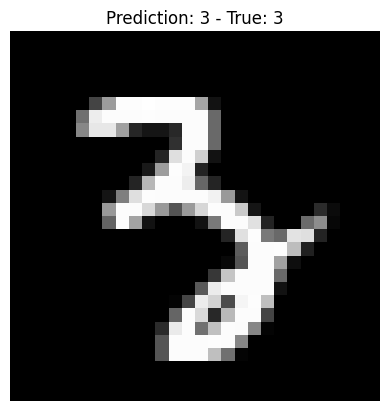

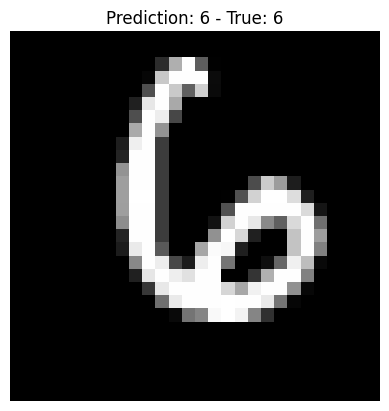

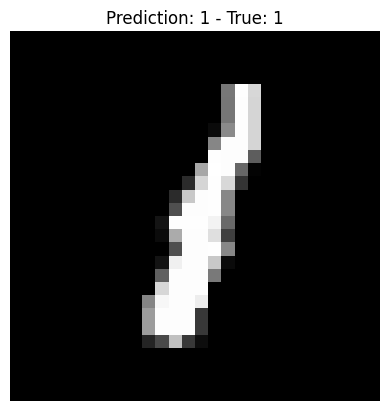

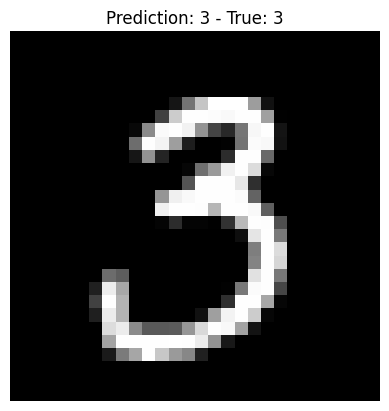

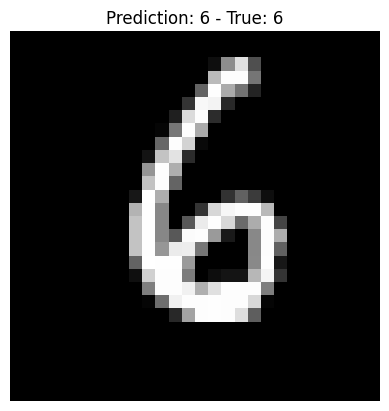

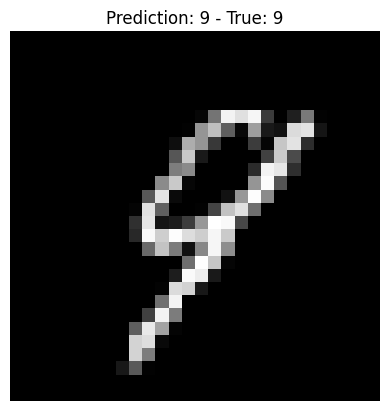

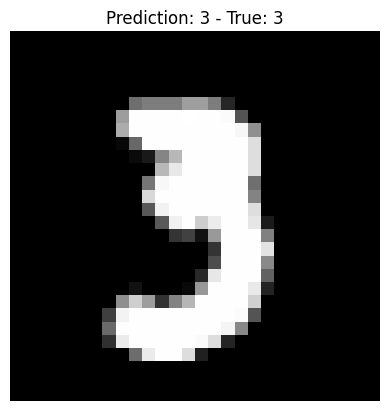

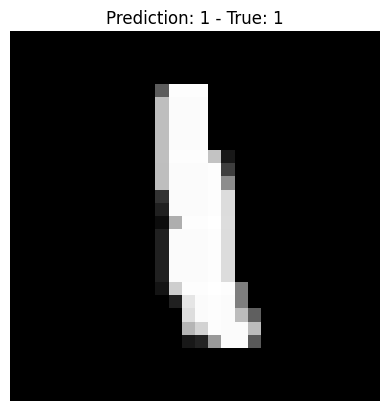

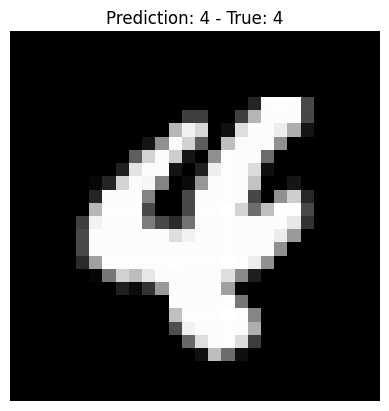

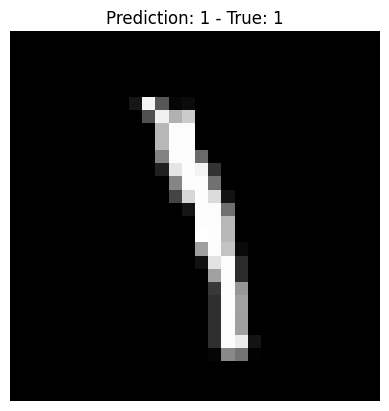

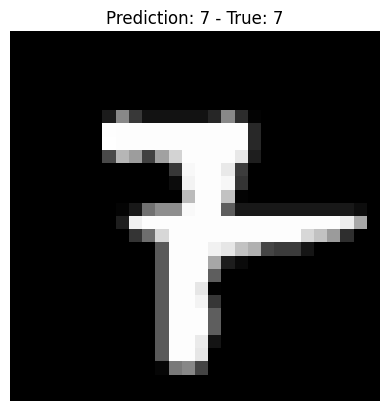

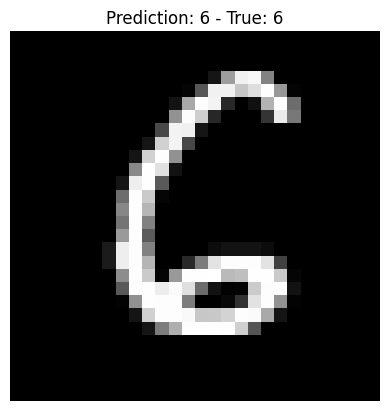

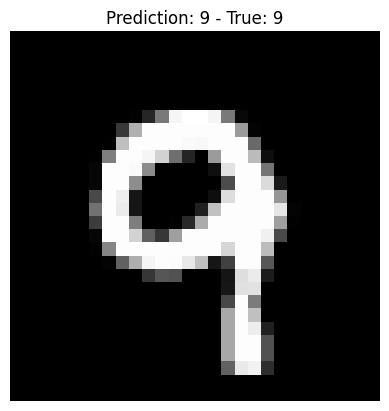

In [11]:
predictions = model.predict(x_test[:100])

# Hiển thị kết quả dự đoán
for i in range(100):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Prediction: {np.argmax(predictions[i])} - True: {y_test[i]}")
    plt.axis('off')
    plt.show()
